Matplotlib is building the font cache; this may take a moment.


=== Ошибочная модель (демонстрирует парадокс) ===
Средний выигрыш при сохранении конверта: 499.55
Средний выигрыш при смене конверта: 627.92
Отношение выигрышей (смена/сохранение): 1.2570

=== Корректная модель ===
Средний выигрыш при сохранении конверта: 749.30
Средний выигрыш при смене конверта: 751.01
Отношение выигрышей (смена/сохранение): 1.0023


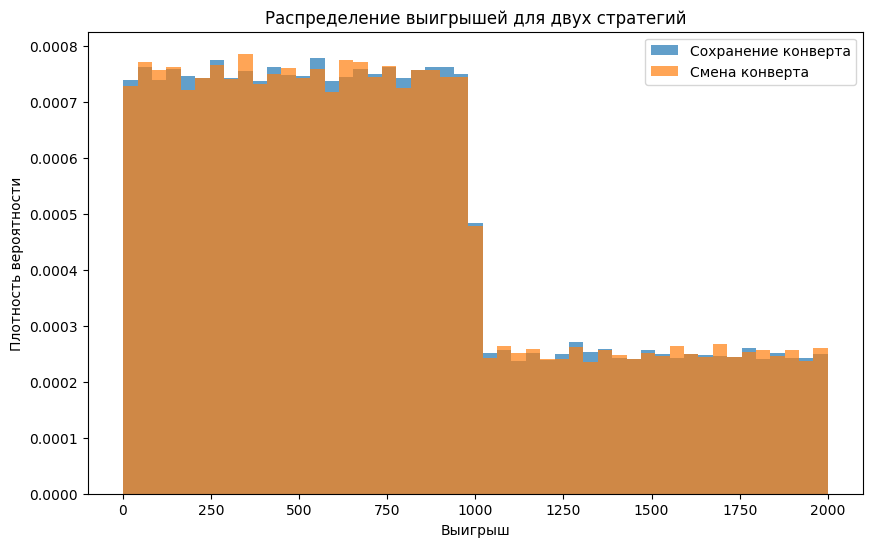

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Симуляция выбора конверта
def simulate_envelope_paradox_incorrect(num_trials):
    total_gain_switch = 0
    total_gain_stay = 0

    for _ in range(num_trials):
        A = random.randint(1, 1000)

        other_envelope = 0.5 * (2*A) + 0.5 * (0.5*A)

        if random.choice([True, False]):
            actual_other = 2 * A
        else:
            actual_other = 0.5 * A

        total_gain_stay += A
        total_gain_switch += actual_other

    avg_gain_stay = total_gain_stay / num_trials
    avg_gain_switch = total_gain_switch / num_trials

    print("=== Ошибочная модель (демонстрирует парадокс) ===")
    print(f"Средний выигрыш при сохранении конверта: {avg_gain_stay:.2f}")
    print(f"Средний выигрыш при смене конверта: {avg_gain_switch:.2f}")
    print(f"Отношение выигрышей (смена/сохранение): {avg_gain_switch/avg_gain_stay:.4f}\n")

    return avg_gain_stay, avg_gain_switch

# Корректный выбор
def simulate_envelope_correct(num_trials):
    total_gain_switch = 0 # выигрыш при смене конверта
    total_gain_stay = 0 # выигрыш при сохранении конверта
    gains_stay = []
    gains_switch = []

    for _ in range(num_trials):
        smaller_amount = random.randint(1, 1000)
        larger_amount = 2 * smaller_amount

        envelopes = [smaller_amount, larger_amount]
        random.shuffle(envelopes)

        choice = random.choice([0, 1])
        my_envelope = envelopes[choice]
        other_envelope = envelopes[1 - choice]

        total_gain_stay += my_envelope
        gains_stay.append(my_envelope)

        total_gain_switch += other_envelope
        gains_switch.append(other_envelope)

    avg_gain_stay = total_gain_stay / num_trials
    avg_gain_switch = total_gain_switch / num_trials

    print("=== Корректная модель ===")
    print(f"Средний выигрыш при сохранении конверта: {avg_gain_stay:.2f}")
    print(f"Средний выигрыш при смене конверта: {avg_gain_switch:.2f}")
    print(f"Отношение выигрышей (смена/сохранение): {avg_gain_switch/avg_gain_stay:.4f}")

    plt.figure(figsize=(10, 6))
    bins = np.linspace(min(gains_stay + gains_switch), max(gains_stay + gains_switch), 50)
    plt.hist(gains_stay, bins=bins, alpha=0.7, label='Сохранение конверта', density=True)
    plt.hist(gains_switch, bins=bins, alpha=0.7, label='Смена конверта', density=True)
    plt.xlabel('Выигрыш')
    plt.ylabel('Плотность вероятности')
    plt.title('Распределение выигрышей для двух стратегий')
    plt.legend()
    plt.show()

    return avg_gain_stay, avg_gain_switch

avg_stay_incorrect, avg_switch_incorrect = simulate_envelope_paradox_incorrect(150000)
avg_stay_correct, avg_switch_correct = simulate_envelope_correct(150000)